In [73]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from interpret.blackbox import LimeTabular
from interpret import show
import shap
# Makes sure we see all columns
pd.set_option('display.max_columns', None)

In [74]:
df_rd = pd.read_csv('./dataset/Encoded_binary.csv')

In [75]:
df=df_rd.iloc[:,1:]

In [76]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,4,0,6,1,1,7,5,59,1,12,0,0,0,10,4,10,8,-99,-99,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,0,4,1,18,7,2,39,0,10,0,0,0,2,9,2,5,-99,-99,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,1,5,6,1,17,3,56,3,14,0,0,0,10,9,2,6,-99,-99,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,2,0,5,6,1,17,1,62,0,9,0,0,0,3,9,9,8,-99,-99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,6,1,6,7,5,55,0,16,0,0,0,7,6,7,9,-99,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68095,2,0,5,1,4,7,14,69,0,16,0,0,0,9,9,9,5,-99,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
68096,2,0,8,1,1,7,9,50,2,33,0,0,0,3,3,9,9,-99,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
68097,4,0,7,1,1,7,2,46,6,17,1,1,1,8,4,2,9,-99,-99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1
68098,0,0,7,1,1,7,6,45,1,25,3,1,2,9,2,2,9,-99,-99,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1


In [77]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
train_test_split(X, y, test_size=0.20, random_state=2021)
# Split the data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2021)
print(X_train.shape)
print(X_test.shape)

(54480, 42)
(13620, 42)


In [78]:
y

0        0
1        0
2        0
3        0
4        0
        ..
68095    1
68096    1
68097    1
68098    1
68099    1
Name: readmitted, Length: 68100, dtype: int64

In [79]:
y_train

58385    1
42042    1
6402     0
48245    1
21974    0
        ..
21149    0
30764    0
20318    0
2669     0
6201     0
Name: readmitted, Length: 54480, dtype: int64

In [80]:
train_test_split(X, y, test_size=0.20, random_state=2021)

[       race  gender  age  admission_type_id  discharge_disposition_id  \
 58385     0       1    8                  1                         6   
 42042     0       0    7                  1                         1   
 6402      2       1    6                  3                         6   
 48245     2       1    8                  1                         1   
 21974     4       0    8                  3                         3   
 ...     ...     ...  ...                ...                       ...   
 21149     0       0    8                  1                        23   
 30764     2       1    9                  1                         1   
 20318     2       0    7                  3                         1   
 2669      2       1    9                  1                         5   
 6201      2       0    5                  2                         1   
 
        admission_source_id  time_in_hospital  num_lab_procedures  \
 58385                    7              

In [81]:
from interpret.glassbox import (LogisticRegression,
                                ClassificationTree,
                                ExplainableBoostingClassifier)
from interpret import show
from sklearn.metrics import f1_score, accuracy_score

### Logistic Regression

In [82]:
# Fit logistic regression model
lr = LogisticRegression(
    random_state=2021, feature_names=X_train.columns, penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)
print("Training finished.")
print("Training finished.")

Training finished.
Training finished.


In [83]:
y_pred = lr.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

F1 Score 0.5866980202680513
Accuracy 0.5874449339207048


In [84]:
# Explain local prediction
lr_local = lr.explain_local(
    X_test[:100], y_test[:100], name='Logistic Regression')
show(lr_local)

C:\Users\adith\AppData\Local\Temp\ipykernel_14240\1699792441.py:3: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



<!-- http://127.0.0.1:7001/2648315331632/ -->

In [85]:
# Explain global logistic regression model
lr_global = lr.explain_global(name='Logistic Regression')
show(lr_global)

<!-- http://127.0.0.1:7001/2648316009040/ -->

In [86]:
# Fit decision tree model
tree = ClassificationTree()
tree.fit(X_train, y_train)
print("Training finished.")
y_pred = tree.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")


Training finished.
F1 Score 0.5840669853530748
Accuracy 0.5878854625550661


In [87]:
# Explain local prediction
tree_local = tree.explain_local(X_test[:100], y_test[:100], name='Tree')
show(tree_local)

C:\Users\adith\AppData\Local\Temp\ipykernel_14240\551330353.py:2: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



<!-- http://127.0.0.1:7001/2648315332544/ -->

In [88]:
# Fit Explainable Boosting Machine
ebm = ExplainableBoostingClassifier(random_state=2021)
ebm.fit(X_train, y_train)
print("Training finished.")
y_pred = ebm.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

Training finished.
F1 Score 0.6054329737909041
Accuracy 0.6054331864904552


In [89]:
# Explain locally
ebm_local = ebm.explain_local(X_test[:100], y_test[:100], name='EBM')
show(ebm_local)

C:\Users\adith\AppData\Local\Temp\ipykernel_14240\1320200277.py:2: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



<!-- http://127.0.0.1:7001/2647519646032/ -->

In [90]:
# Explain globally
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

<!-- http://127.0.0.1:7001/2647496866928/ -->

In [91]:
# Fit blackbox model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

F1 Score 0.5934375066226034
Accuracy 0.5934654919236417


### LIME

In [92]:
# Apply lime
# Initilize Lime for Tabular data
lime = LimeTabular(model=rf,
                   data=X_train,
                   random_state=1)

# Get local explanations
lime_local = lime.explain_local(X_test[-20:],
                                y_test[-20:],
                                name='LIME')

show(lime_local)

C:\Users\adith\AppData\Local\Temp\ipykernel_14240\3656004997.py:10: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



<!-- http://127.0.0.1:7001/2648397610288/ -->

### SHAP

In [93]:
# Create SHAP explainer
explainer = shap.TreeExplainer(rf)
# Calculate shapley values for test data
start_index = 1
end_index = 100
shap_values = explainer.shap_values(X_test[start_index:end_index])
X_test[start_index:end_index]

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
46089,2,1,7,3,1,1,2,35,2,21,0,0,1,2,2,9,9,-99,-99,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
12387,2,0,8,1,3,7,10,67,2,29,2,0,1,3,3,9,9,-99,-99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
37765,0,0,3,1,1,7,1,36,0,11,0,0,0,10,2,9,3,-99,-99,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
16849,2,0,6,1,1,7,6,45,0,24,0,0,0,6,9,2,6,-99,-99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
10356,2,1,5,2,1,1,6,32,0,9,0,0,1,7,2,9,9,-99,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29449,2,1,9,3,6,4,10,44,0,16,0,0,1,9,9,9,7,-99,-99,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
9650,0,0,6,1,3,7,4,29,2,18,0,0,0,8,7,9,9,-99,-99,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
42716,2,1,8,5,6,17,2,20,0,16,1,3,0,9,9,9,9,1,-99,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
8607,0,1,4,6,1,7,1,39,0,6,0,0,0,10,9,9,3,0,-99,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [94]:
print(shap_values[0].shape)
shap_values

(99, 42)


[array([[ 2.18473821e-03,  1.62731873e-02, -5.17807939e-03, ...,
         -3.16484704e-07, -5.83927039e-03, -4.30053865e-03],
        [-1.91486635e-03, -6.89754867e-03, -6.57153826e-03, ...,
         -1.65503424e-07, -4.55877289e-03,  7.77486184e-03],
        [ 1.32813298e-02, -4.76823069e-04,  2.04254841e-02, ...,
         -3.64630918e-07,  1.05963030e-03, -7.15014165e-03],
        ...,
        [-1.18784037e-03,  1.07650921e-02, -5.74299542e-03, ...,
         -2.31064302e-07, -7.61305733e-03, -6.48122298e-03],
        [-8.75360074e-03,  5.52252995e-03,  3.98001080e-02, ...,
         -2.44764582e-07, -3.17162510e-03, -7.95493923e-03],
        [ 1.27418973e-02, -3.05939703e-03, -5.19155257e-03, ...,
         -3.55340332e-07, -4.22782707e-03, -5.29115140e-03]]),
 array([[-2.18473821e-03, -1.62731873e-02,  5.17807939e-03, ...,
          3.16484704e-07,  5.83927039e-03,  4.30053865e-03],
        [ 1.91486635e-03,  6.89754867e-03,  6.57153826e-03, ...,
          1.65503424e-07,  4.55877289e

In [95]:
shap.initjs()
prediction = rf.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index])  # for values

The RF predicted: 1


In [96]:
prediction = rf.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index])  # for values

The RF predicted: 1


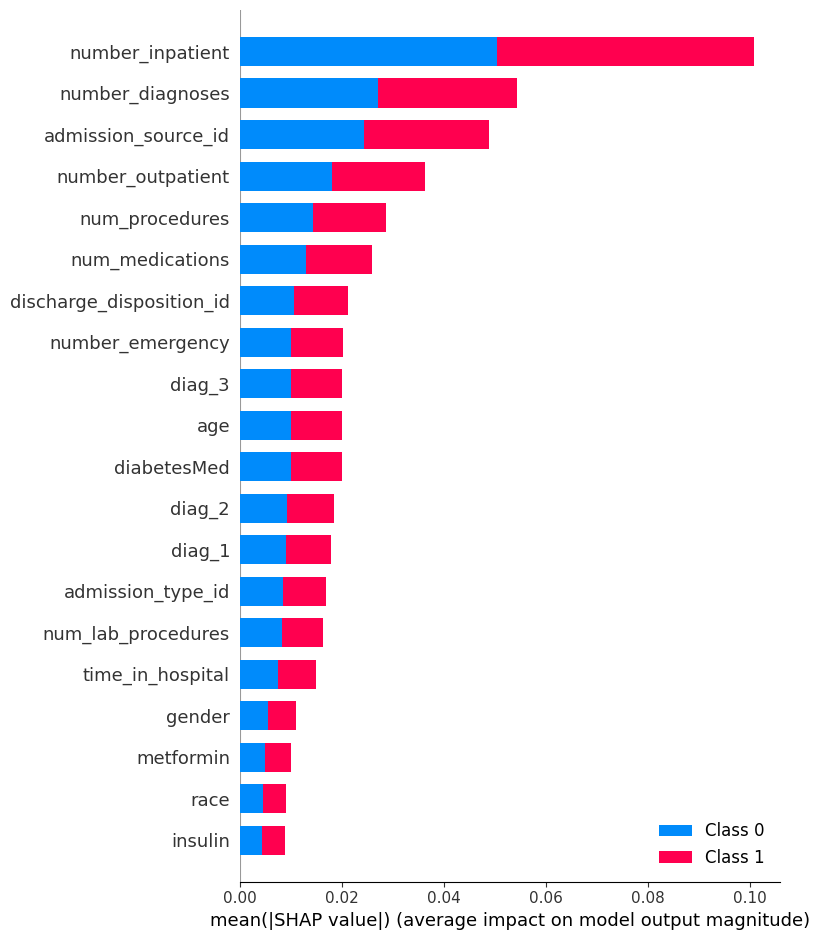

In [97]:
shap.summary_plot(shap_values, X_test)

In [98]:
import xgboost
import shap

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X_train, y_train)

# explain the model's predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X_test)


c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:122: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



In [99]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,4,0,6,1,1,7,5,59,1,12,0,0,0,10,4,10,8,-99,-99,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,0,4,1,18,7,2,39,0,10,0,0,0,2,9,2,5,-99,-99,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,1,5,6,1,17,3,56,3,14,0,0,0,10,9,2,6,-99,-99,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,2,0,5,6,1,17,1,62,0,9,0,0,0,3,9,9,8,-99,-99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,6,1,6,7,5,55,0,16,0,0,0,7,6,7,9,-99,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68095,2,0,5,1,4,7,14,69,0,16,0,0,0,9,9,9,5,-99,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
68096,2,0,8,1,1,7,9,50,2,33,0,0,0,3,3,9,9,-99,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
68097,4,0,7,1,1,7,2,46,6,17,1,1,1,8,4,2,9,-99,-99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1
68098,0,0,7,1,1,7,6,45,1,25,3,1,2,9,2,2,9,-99,-99,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1


In [100]:
top_attr = ['admission_type_id', 'admission_source_id', 'discharge_disposition_id', 
            'time_in_hospital', 'number_diagnoses', 'diag_1', 'diag_2', 'num_medications', 
            'age', 'gender', 'number_inpatient', 'number_outpatient']


In [101]:
len(top_attr)

12

In [102]:
X = df[top_attr]
Y = pd.get_dummies(df['readmitted'])

In [103]:
from sklearn.model_selection import train_test_split
# X=df.drop('readmitted',axis=1)
# Y=df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [104]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

F1 Score 0.5680278860783567
Accuracy 0.5626284875183554


In [105]:
import pickle
filename= 'trained_model.sav'
pickle.dump(rf,open(filename,'wb'))

In [106]:
X

,admission_type_id,admission_source_id,discharge_disposition_id,time_in_hospital,number_diagnoses,diag_1,diag_2,num_medications,age,gender,number_inpatient,number_outpatient
0,1,7,1,5,8,10,4,12,6,0,0,0
1,1,7,18,2,5,2,9,10,4,0,0,0
2,6,17,1,3,6,10,9,14,5,1,0,0
3,6,17,1,1,8,3,9,9,5,0,0,0
4,1,7,6,5,9,7,6,16,6,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68095,1,7,4,14,5,9,9,16,5,0,0,0
68096,1,7,1,9,9,3,3,33,8,0,0,0
68097,1,7,1,2,9,8,4,17,7,0,1,1
68098,1,7,1,6,9,9,2,25,7,0,2,3


In [107]:
Y

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
68095,0,1
68096,0,1
68097,0,1
68098,0,1


In [108]:
y_train

,0,1
38894,0,1
55712,0,1
32584,1,0
38249,0,1
5653,1,0
...,...,...
41993,0,1
21243,1,0
45891,0,1
42613,0,1


In [109]:
X_test

,admission_type_id,admission_source_id,discharge_disposition_id,time_in_hospital,number_diagnoses,diag_1,diag_2,num_medications,age,gender,number_inpatient,number_outpatient
65740,8,1,1,4,5,5,9,20,8,1,0,0
30219,2,1,3,4,5,4,9,10,9,0,0,0
19905,1,7,23,9,9,2,2,36,9,0,0,0
3203,1,7,1,6,7,6,9,20,5,0,0,0
35734,1,7,1,10,9,2,2,23,7,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18338,1,7,1,2,6,2,2,19,9,0,2,0
43256,1,7,1,5,6,2,2,10,5,0,0,0
1694,6,7,1,3,5,2,9,11,7,1,0,0
59588,2,7,3,4,9,2,2,13,9,0,1,0


In [110]:
print(rf.feature_names_in_)

['admission_type_id' 'admission_source_id' 'discharge_disposition_id'
 'time_in_hospital' 'number_diagnoses' 'diag_1' 'diag_2' 'num_medications'
 'age' 'gender' 'number_inpatient' 'number_outpatient']


In [111]:
import numpy as np


abc=X_test.iloc[1]
abc = np.asarray(abc)
gg = abc.reshape(1, -1)
pred = rf.predict(gg)
print(pred)

[[1 0]]


c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [112]:
import shap
explainer = shap.TreeExplainer(rf)

In [113]:
X_test.loc[[6218]]

,admission_type_id,admission_source_id,discharge_disposition_id,time_in_hospital,number_diagnoses,diag_1,diag_2,num_medications,age,gender,number_inpatient,number_outpatient
6218,6,1,25,8,6,9,3,21,6,0,0,0


In [114]:
# Calculate Shap values
choosen_instance = X_test.loc[[28097]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [115]:
import xgboost
xgb =  xgboost.XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [116]:
explainer = shap.TreeExplainer(xgb)

In [117]:
shap_values = explainer.shap_values(choosen_instance)

c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:122: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



In [118]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)